<a href="https://colab.research.google.com/github/pratchayapron/229351-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/229351_LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-06 08:37:41--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-06 08:37:41 (41.5 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


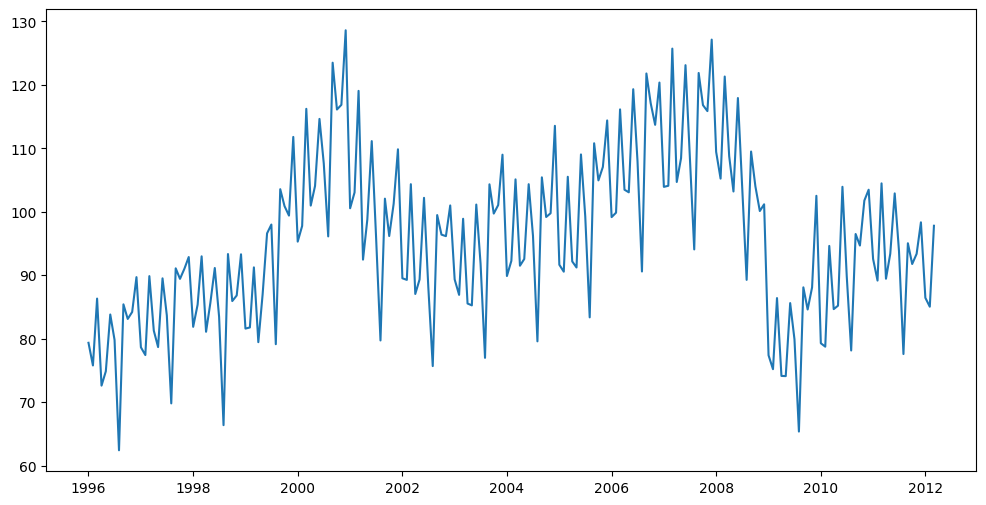

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [ ]:
# Add or change values

data.loc['2012-01-01','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.45


# Moving average

In [ ]:

data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.tail(12)

,Unnamed: 0,value,MA
time,,,
2011-04-01,184,89.45,95.878
2011-05-01,185,93.40,96.800
2011-06-01,186,102.90,91.420
2011-07-01,187,93.77,92.538
2011-08-01,188,77.58,92.212
2011-09-01,189,95.04,90.306
2011-10-01,190,91.77,91.220
2011-11-01,191,93.37,92.994
2011-12-01,192,98.34,90.994


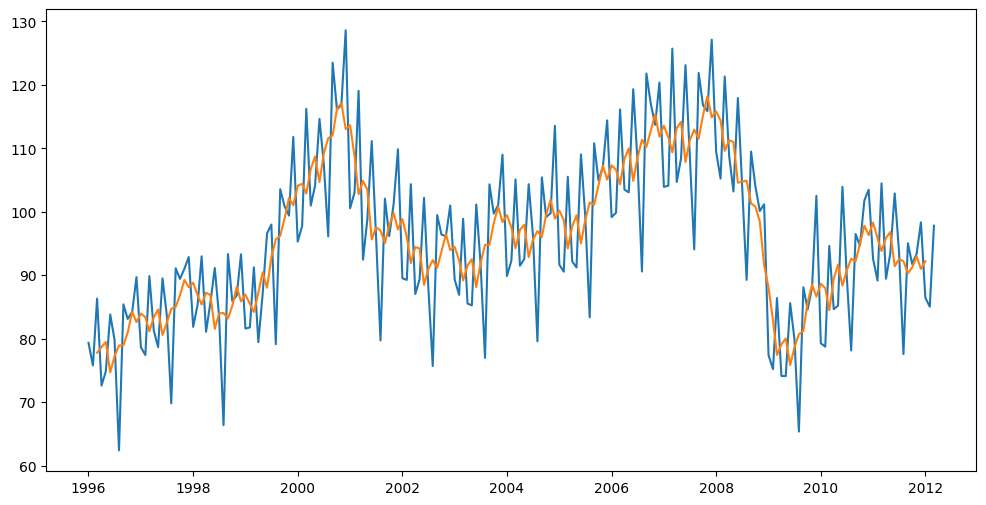

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

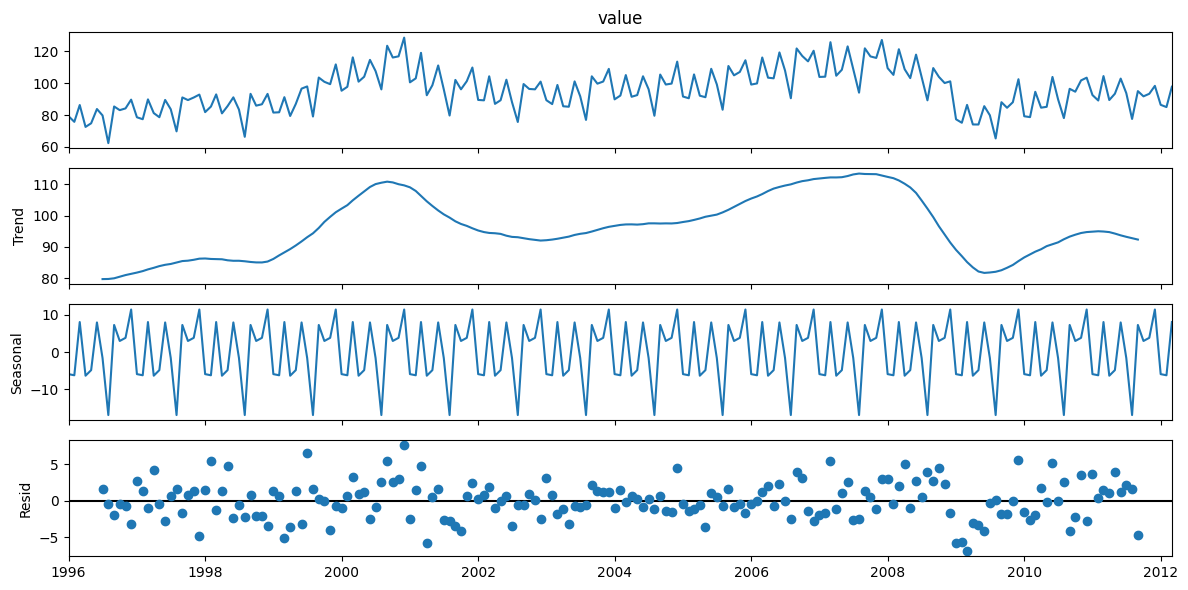

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

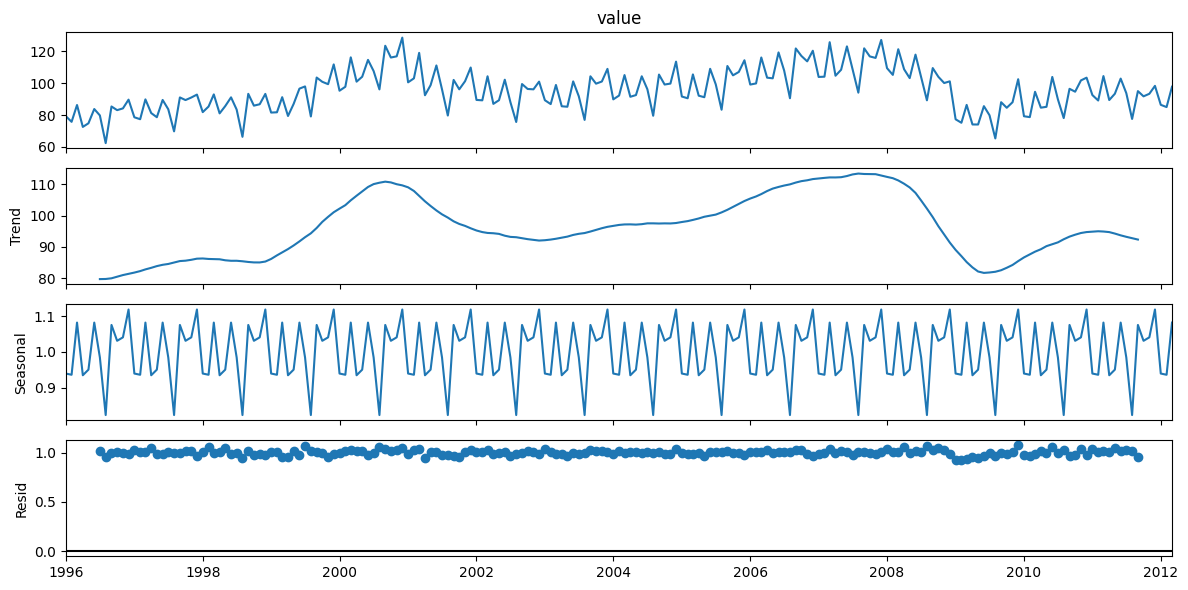

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887651
1996-02-01    -6.199262
1996-03-01     8.083182
1996-04-01    -6.314957
1996-05-01    -4.818457
                ...    
2011-11-01     3.847376
2011-12-01    11.447515
2012-01-01    -5.887651
2012-02-01    -6.199262
2012-03-01     8.083182
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.45
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

1.สร้างโมเดลเพื่อการทำนายดังนี้ 1.1 แบ่งข้อมูลออกเป็น 2 ส่วน

-training set: วันที่ 1996-01-01 ถึง 2009-12-01
-test set: วันที่ 2010-01-01 ถึง 2012-03-01

In [ ]:
training_set = data.loc['1996-01-01':'2009-12-01'].copy()
training_set = training_set.dropna()
training_set.head()

,Unnamed: 0,value,MA
time,,,
1996-03-01,3,86.32,77.782
1996-04-01,4,72.60,78.674
1996-05-01,5,74.86,79.478
1996-06-01,6,83.81,74.696
1996-07-01,7,79.80,77.258


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 1996-03-01 to 2009-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  166 non-null    int64  
 1   value       166 non-null    float64
 2   MA          166 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


In [ ]:
test_set = data.loc['2010-01-01':'2012-03-01'].copy()
test_set.dropna()
test_set.head()

,Unnamed: 0,value,MA
time,,,
2010-01-01,169,79.28,88.650
2010-02-01,170,78.74,87.964
2010-03-01,171,94.62,84.500
2010-04-01,172,84.66,89.432
2010-05-01,173,85.20,91.658


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2010-01-01 to 2012-03-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  27 non-null     int64  
 1   value       27 non-null     float64
 2   MA          25 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 864.0 bytes


1.2 แยกส่วนประกอบ  yt=St+Tt+Rt  บน training set

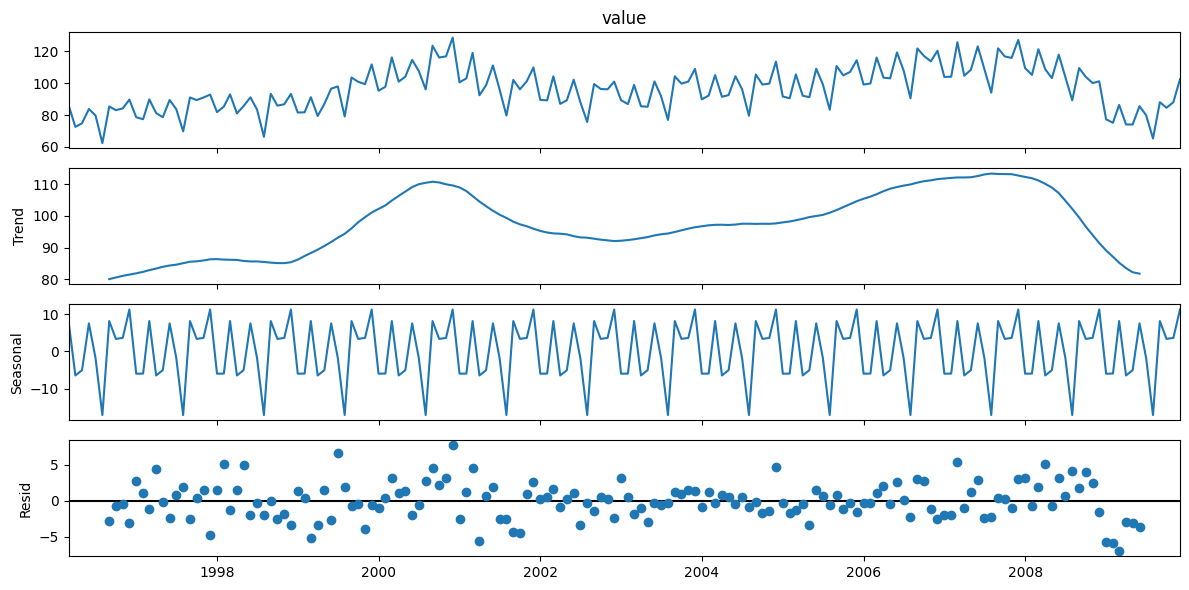

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(training_set['value'], model='additive')

result_add.plot();

 1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า  Tt+Rt  ของวันล่าสุดใน training set ที่มีค่า  Tt  มาบวกกับแต่ละค่าใน  St  จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01


In [ ]:
TR_last = (result_add.trend + result_add.resid).dropna().iloc[-1]
S_t = result_add.seasonal
y_pred = pd.Series(
    [TR_last + S_t.iloc[date.month - 1] for date in test_set.index],
    index=test_set.index)
y_pred.head()

,0
time,
2010-01-01,86.240256
2010-02-01,71.594583
2010-03-01,73.015833
2010-04-01,85.610000
2010-05-01,76.273889


2. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง


In [ ]:
y_true = test_set['value']
def rmse(y_true,y_pred):
  return np.sqrt(np.mean(np.square(y_true-y_pred)))
rmse_value = rmse(y_true, y_pred)
print(f"RMSE = {rmse_value:.4f}")

RMSE = 19.4695


3. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

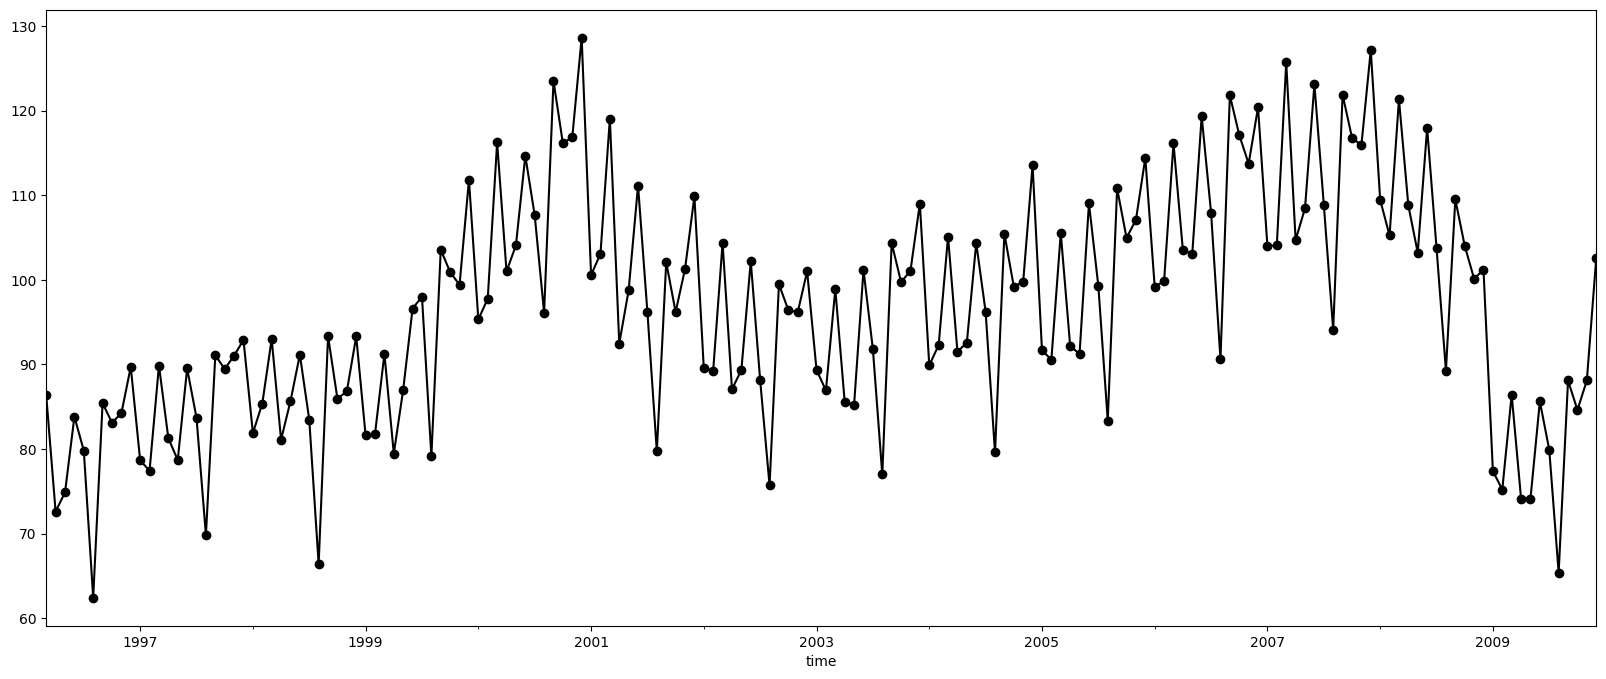

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
result_add.observed.plot(ax=ax, marker='o', color='black', label='Observed')
plt.show()